In [180]:
import warnings

In [181]:
warnings.filterwarnings('ignore')

In [182]:
import pandas as pd

In [183]:
data= pd.read_csv('car data.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [184]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [185]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [186]:
data.shape

(301, 9)

In [187]:
print('Number of Rows',data.shape[0])
print('Number of Columns',data.shape[1])

Number of Rows 301
Number of Columns 9


In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [189]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [190]:
cat=[]
num=[]

In [191]:
for i in data.columns:
    if data[i].dtype== 'object':
        cat.append(i)
    else:
        num.append(i)

In [192]:
cat

['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']

In [193]:
num

['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

In [194]:
q1= data['Year'].quantile(0.25)
q3= data['Year'].quantile(0.75)
iqr= q3-q1
lf= q1- 1.5*iqr
uf= q3+ 1.5*iqr
outliers= data[(data['Year']<lf) & (data['Year']>uf)]
print("percentage of outliers in", i ,outliers.shape[0]*100/data.shape[0])

percentage of outliers in Owner 0.0


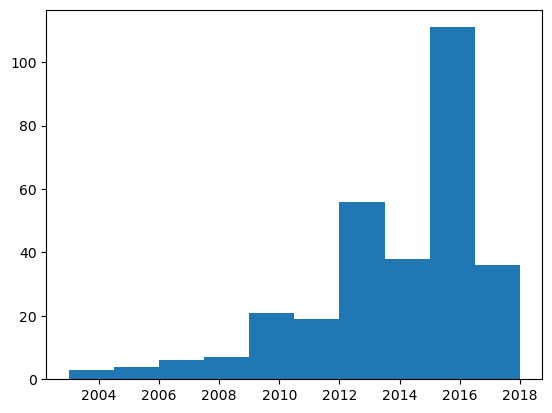

In [195]:
import matplotlib.pyplot as plt
plt.hist((data['Year']))
plt.show()

In [196]:
def outlier_detection_treatment(col):
    q1= data[col].quantile(0.25)
    q3= data[col].quantile(0.75)
    iqr= q3-q1
    lf= q1- 1.5*iqr
    uf= q3+ 1.5*iqr
    outliers= data[(data[col]<lf) | (data[col]>uf)]
    print("Percentage of outliers in", col ,outliers.shape[0]*100/data.shape[0])
    fig, ax= plt.subplots(1,2, figsize=(6,4))
    ax[0].boxplot(data[col])
    ax[1].hist(data[col])
    plt.suptitle(col)
    plt.show()
    data.loc[(data[col]<lf) | (data[col]>uf), col]= data[col].median()

Percentage of outliers in Year 2.3255813953488373


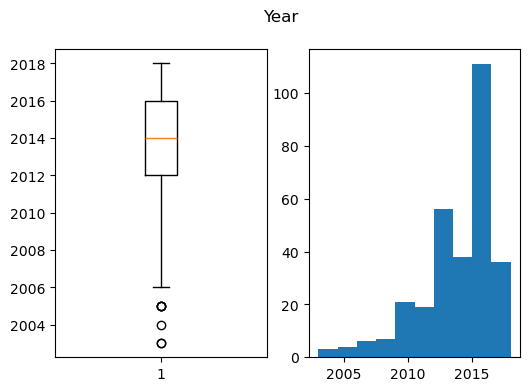

None
+++====+++
Percentage of outliers in Selling_Price 5.647840531561462


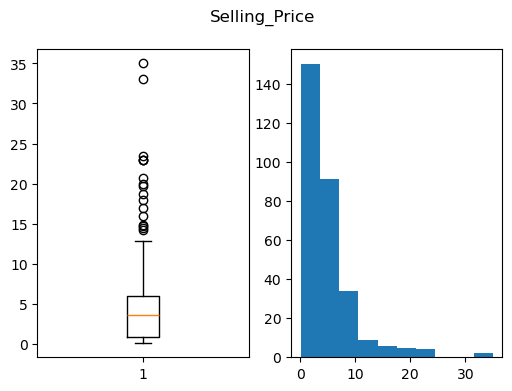

None
+++====+++
Percentage of outliers in Present_Price 4.651162790697675


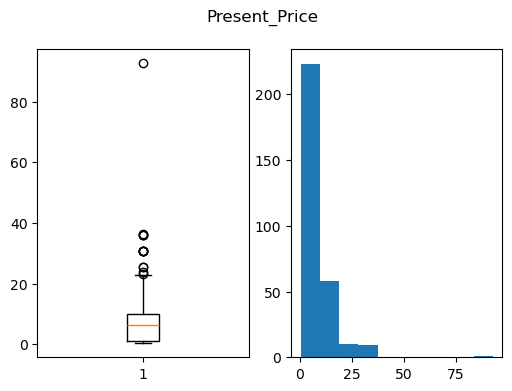

None
+++====+++
Percentage of outliers in Driven_kms 2.6578073089700998


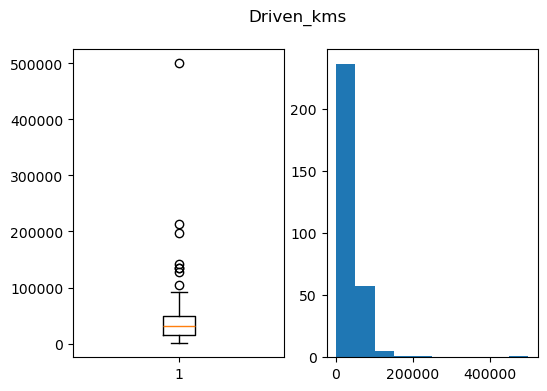

None
+++====+++
Percentage of outliers in Owner 3.654485049833887


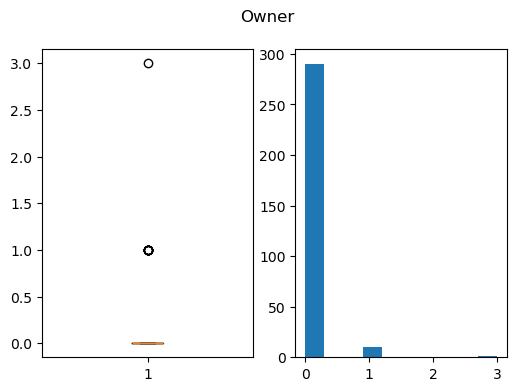

None
+++====+++


In [197]:
for col in num:
    print(outlier_detection_treatment(col))
    print("+++====+++")

In [198]:
cat

['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']

In [199]:
import seaborn as sns

def cat_analysis(col):
    data[col].value_counts()
    sns.countplot(x=data[col])
    plt.show()

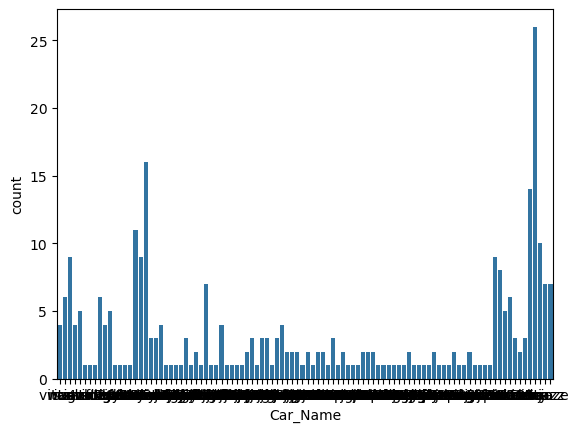

None


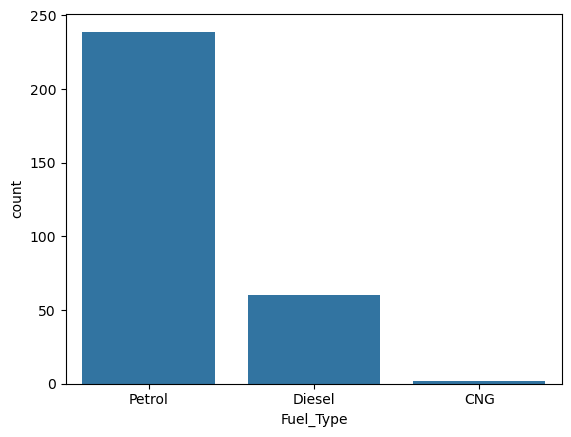

None


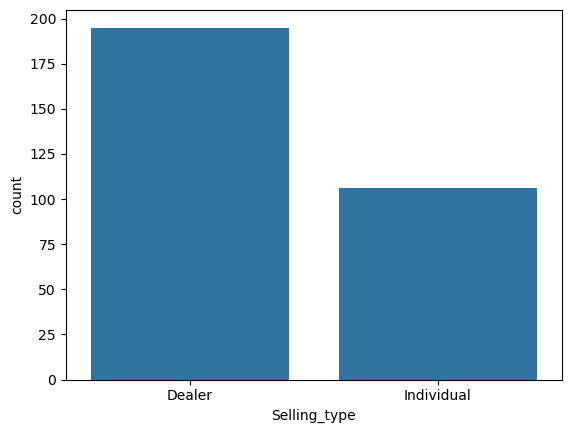

None


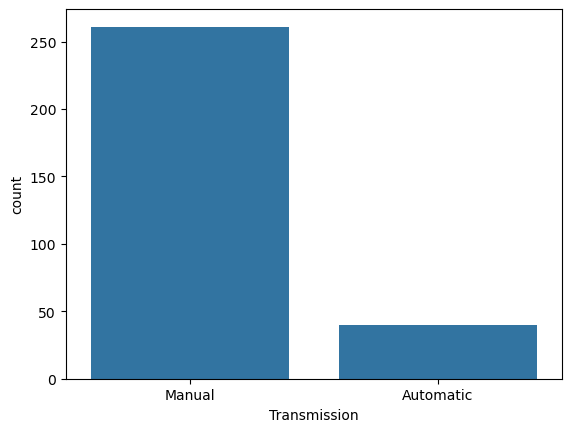

None


In [200]:
for i in cat:
    print(cat_analysis(i))

In [201]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.0
mean,2013.853821,3.704751,6.306811,32634.790698,0.0
std,2.501711,2.962674,5.061461,21148.159344,0.0
min,2006.000000,0.100000,0.320000,500.000000,0.0
25%,2012.000000,0.900000,1.200000,15000.000000,0.0
50%,2014.000000,3.600000,6.400000,32000.000000,0.0
75%,2016.000000,5.400000,9.400000,45078.000000,0.0
max,2018.000000,12.900000,22.830000,92233.000000,0.0


In [202]:
data.head(1)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0


In [203]:
import datetime

In [204]:
date_time = datetime.datetime.now()

In [205]:
data['Age']= date_time.year - data['Year']

In [206]:
data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [207]:
data.drop('Year',axis=1,inplace=True)

In [208]:
data.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [209]:
import seaborn as sns


<Axes: ylabel='Selling_Price'>

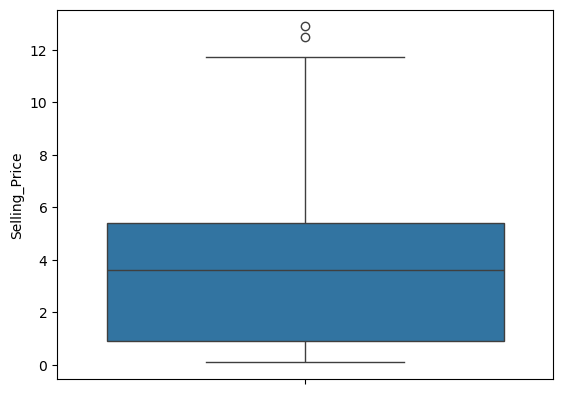

In [210]:
sns.boxplot(data['Selling_Price'])

In [211]:
sorted(data['Selling_Price'],reverse=True)

[12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.65,
 3.6,
 3.6,
 3.6,
 3.6,
 3.6,
 3.6,
 3.6,
 3.6,
 3.6,
 3.6,
 3.6,
 3.6,
 3.6,
 3.6,
 3.6,
 3.6,
 3.6,
 3.6,
 3.51,
 3.5,
 

In [212]:
data = data[~(data['Selling_Price']>=33.0) & (data['Selling_Price']<=35.0)]

In [213]:
data.shape

(301, 9)

In [214]:
data.head(1)

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10


In [215]:
data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [216]:
data['Fuel_Type'] = data['Fuel_Type'].map({'Petrol':0, 'Diesel':1, 'CNG':2})

In [217]:
data['Fuel_Type'].unique()

array([0, 1, 2], dtype=int64)

In [218]:
data['Selling_type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [219]:
data['Selling_type'] = data['Selling_type'].map({'Dealer':0, 'Individual':1})

In [220]:
data['Selling_type'].unique()

array([0, 1], dtype=int64)

In [221]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [222]:
data['Transmission'] = data['Transmission'].map({'Manual':0, 'Automatic':1})

In [223]:
data['Transmission'].unique()

array([0, 1], dtype=int64)

In [224]:
data.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,10
1,sx4,4.75,9.54,43000,1,0,0,0,11
2,ciaz,7.25,9.85,6900,0,0,0,0,7
3,wagon r,2.85,4.15,5200,0,0,0,0,13
4,swift,4.60,6.87,42450,1,0,0,0,10


In [225]:
X = data.drop(['Car_Name','Selling_Price'],axis=1)
y = data['Selling_Price']

In [226]:
X

,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,5.59,27000,0,0,0,0,10
1,9.54,43000,1,0,0,0,11
2,9.85,6900,0,0,0,0,7
3,4.15,5200,0,0,0,0,13
4,6.87,42450,1,0,0,0,10
...,...,...,...,...,...,...,...
296,11.60,33988,1,0,0,0,8
297,5.90,60000,0,0,0,0,9
298,11.00,87934,0,0,0,0,15
299,12.50,9000,1,0,0,0,7


In [227]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [228]:
from sklearn.model_selection import train_test_split

In [229]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

In [230]:
data.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,10
1,sx4,4.75,9.54,43000,1,0,0,0,11
2,ciaz,7.25,9.85,6900,0,0,0,0,7
3,wagon r,2.85,4.15,5200,0,0,0,0,13
4,swift,4.60,6.87,42450,1,0,0,0,10


In [231]:
!pip install xgboost

In [232]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [233]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [234]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [235]:
xgb = GradientBoostingRegressor()
xgb.fit(X_train,y_train)

GradientBoostingRegressor()

In [236]:
xg = XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [237]:
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = xgb.predict(X_test)
y_pred4 = xg.predict(X_test)

In [238]:
from sklearn import metrics

In [239]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [240]:
print(score1,score2,score3,score4)

0.6644987752502156 0.8953277224006754 0.9008839233216215 0.9013584192267421


In [241]:
final_data = pd.DataFrame({'Models':['LR','RF','GBR','XG'],
             "R2_SCORE":[score1,score2,score3,score4]})

In [242]:
final_data

,Models,R2_SCORE
0,LR,0.664499
1,RF,0.895328
2,GBR,0.900884
3,XG,0.901358


In [243]:
import seaborn as sns
import matplotlib.pyplot as plt

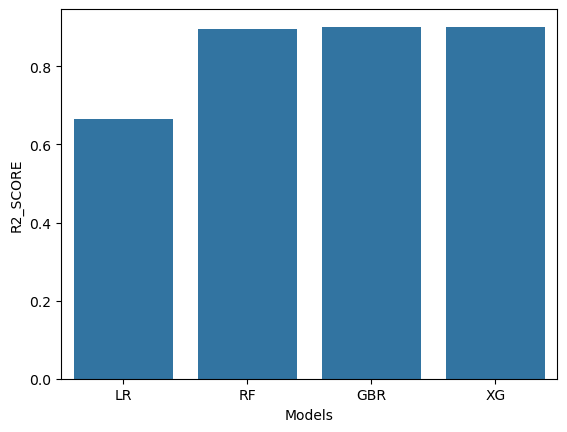

In [244]:
sns.barplot(x='Models', y='R2_SCORE', data=final_data)
plt.show()

In [245]:
xg = XGBRegressor()
xg_final = xg.fit(X,y)

In [246]:
import joblib

In [247]:
joblib.dump(xg_final,'car_price_predictor')

['car_price_predictor']

In [248]:
model = joblib.load('car_price_predictor')

In [249]:
import pandas as pd
data_new = pd.DataFrame({
    'Present_Price':5.59,
    'Driven_kms':27000,
    'Fuel_Type':0,
    'Selling_Type':0,
    'Transmission':0,
    'Owner':0,
    'Age':8
},index=[0])

In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Driven_kms     301 non-null    int64  
 4   Fuel_Type      301 non-null    int64  
 5   Selling_type   301 non-null    int64  
 6   Transmission   301 non-null    int64  
 7   Owner          301 non-null    int64  
 8   Age            301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [251]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import joblib

# Load the trained model
model = joblib.load('car_price_predictor')

# Create a new DataFrame with the new data
data_new = pd.DataFrame({
    'Present_Price':5.59,
    'Driven_kms':27000,
    'Fuel_Type':0,
    'Selling_type':0,  # <--- Fix the typo here
    'Transmission':0,
    'Owner':0,
    'Age':8
},index=[0])

# Make a prediction on the new data
prediction = model.predict(data_new)

# Print the predicted price
print("Predicted Price:", prediction[0])

Predicted Price: 3.4804792


In [252]:
from tkinter import *
import joblib

def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    
    model = joblib.load('car_price_predictor')
    data_new = pd.DataFrame({
    'Present_Price':p1,
    'Driven_kms':p2,
    'Fuel_Type':p3,
    'Selling_type':p4,
    'Transmission':p5,
    'Owner':p6,
    'Age':p7
},index=[0])
    result=model.predict(data_new)
    Label(master, text="Car Purchase amount").grid(row=8)
    Label(master, text=result).grid(row=10)
    print("Car Purchase amount", result[0])
    
master = Tk()
master.title("Car Price Prediction Using Machine Learning")
label = Label(master, text = "Car Price Prediction Using Machine Learning"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Present_Price").grid(row=1)
Label(master, text="Driven_kms").grid(row=2)
Label(master, text="Fuel_Type").grid(row=3)
Label(master, text="Selling_type").grid(row=4)
Label(master, text="Transmission").grid(row=5)
Label(master, text="Owner").grid(row=6)
Label(master, text="Age").grid(row=7)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)


Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

Car Purchase amount 2.847758
